In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from helpfulfun import *
%load_ext autoreload
%autoreload 2


In [4]:
#load data
import csv
def readCSVToNumpyArray(dataset):
    values = [[]]
    with open(dataset) as f:
        counter = 0
        for i in csv.reader(f):
            for j in i:
                try:
                    values[counter].append(float(j))
                except ValueError:
                    values[counter].append(j)
            counter = counter + 1
            values.append([])

    data = np.array(values[:-1],dtype='object')

    return data

train = readCSVToNumpyArray('train.csv')[0:,]
test = readCSVToNumpyArray('test.csv')[0:,]
x_tr = train[1:,2:]
y_tr = train[1:,1]
x_te = test[1:,2:]

train[1:,1] = [int(x) for x in train[1:,0]]
test[1:,1] = [int(x) for x in test[1:,0]]

x_tr.shape, y_tr.shape, x_te.shape

((250000, 30), (250000,), (568238, 30))

In [5]:
y_tr = np.where(y_tr == "s",1,0)
print(y_tr.shape, " and y[:5]: ", y_tr[:5])
train[0,:]

(250000,)  and y[:5]:  [0 0 0 0 0]


array(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt'], dtype=object)

In [6]:
for i in range(x_tr.shape[1] ):
    print(i, np.count_nonzero(abs(x_tr[:,i]) == 999.0), train[0,i+2])


0 38114 DER_mass_MMC
1 0 DER_mass_transverse_met_lep
2 0 DER_mass_vis
3 0 DER_pt_h
4 177457 DER_deltaeta_jet_jet
5 177457 DER_mass_jet_jet
6 177457 DER_prodeta_jet_jet
7 0 DER_deltar_tau_lep
8 0 DER_pt_tot
9 0 DER_sum_pt
10 0 DER_pt_ratio_lep_tau
11 0 DER_met_phi_centrality
12 177457 DER_lep_eta_centrality
13 0 PRI_tau_pt
14 0 PRI_tau_eta
15 0 PRI_tau_phi
16 0 PRI_lep_pt
17 0 PRI_lep_eta
18 0 PRI_lep_phi
19 0 PRI_met
20 0 PRI_met_phi
21 0 PRI_met_sumet
22 0 PRI_jet_num
23 99913 PRI_jet_leading_pt
24 99913 PRI_jet_leading_eta
25 99913 PRI_jet_leading_phi
26 177457 PRI_jet_subleading_pt
27 177457 PRI_jet_subleading_eta
28 177457 PRI_jet_subleading_phi
29 0 PRI_jet_all_pt


In [7]:
#keep all except for those with many missng
x_tr_2 = np.delete(x_tr,(4,5,6,12,26,27,28), axis = 1)
for i in range(x_tr_2.shape[1] ):
    print(i, np.count_nonzero(abs(x_tr_2[:,i]) == 999.0), train[0,i+2])


0 38114 DER_mass_MMC
1 0 DER_mass_transverse_met_lep
2 0 DER_mass_vis
3 0 DER_pt_h
4 0 DER_deltaeta_jet_jet
5 0 DER_mass_jet_jet
6 0 DER_prodeta_jet_jet
7 0 DER_deltar_tau_lep
8 0 DER_pt_tot
9 0 DER_sum_pt
10 0 DER_pt_ratio_lep_tau
11 0 DER_met_phi_centrality
12 0 DER_lep_eta_centrality
13 0 PRI_tau_pt
14 0 PRI_tau_eta
15 0 PRI_tau_phi
16 0 PRI_lep_pt
17 0 PRI_lep_eta
18 0 PRI_lep_phi
19 99913 PRI_met
20 99913 PRI_met_phi
21 99913 PRI_met_sumet
22 0 PRI_jet_num


In [8]:
#impute using mean
inds = np.where(x_tr_2 == 999.0)
x_tr_2[abs(x_tr_2) == 999.0] = np.nan
col_mean = np.nanmean(x_tr_2, axis=0)
x_tr_2[inds] = np.take(col_mean, inds[1])
for i in range(x_tr_2.shape[1] ):
    print(i, np.count_nonzero(abs(x_tr_2[:,i]) == 999.0), train[0,i+2])

0 0 DER_mass_MMC
1 0 DER_mass_transverse_met_lep
2 0 DER_mass_vis
3 0 DER_pt_h
4 0 DER_deltaeta_jet_jet
5 0 DER_mass_jet_jet
6 0 DER_prodeta_jet_jet
7 0 DER_deltar_tau_lep
8 0 DER_pt_tot
9 0 DER_sum_pt
10 0 DER_pt_ratio_lep_tau
11 0 DER_met_phi_centrality
12 0 DER_lep_eta_centrality
13 0 PRI_tau_pt
14 0 PRI_tau_eta
15 0 PRI_tau_phi
16 0 PRI_lep_pt
17 0 PRI_lep_eta
18 0 PRI_lep_phi
19 0 PRI_met
20 0 PRI_met_phi
21 0 PRI_met_sumet
22 0 PRI_jet_num


In [12]:
#export the dataset:
np.savetxt("x_tr_2.csv", x_tr_2, fmt="%s", delimiter=",")

In [13]:
# r
train_x_nomiss = train_df.drop(["Prediction", "DER_mass_MMC", "DER_deltaeta_jet_jet",
                                   "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", 
                                   "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi",
                                   "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi"], 
                               axis=1)
x_nomiss = train_x_nomiss.to_numpy()

x_nomiss.shape

NameError: name 'train_df' is not defined

In [12]:
x_der_nomiss = x_nomiss[:, :8]
np.savetxt("x_der_nomiss.csv", x_der_nomiss, delimiter = ",")
x_der_nomiss.shape

(250000, 8)

In [13]:
# Omitting missings implicitly assumes that measurements are independent of missingness 
# (or results can only be generalised to population that’d be non-missing if asked).
# Standard assumption: Missing completely at random (MCAR) Whether an observation is
# missing is independent of its value.
# Otherwise: Missing at random (MAR) Whether an observation is missing only
# depends on observed values, not on the missing ones.
# Example: More people can be expected positive for a virus out of those tested, 
# because more people who are tested have symptoms, but testing may be independent of positivity
# conditionally on symptoms.
# Missing not at random (MNAR) Missingness can depend on the
# missing value, i.e., distribution of true values is genuinely
# different between missings and non-missings.

# Problems:
# Based on data alone cannot tell apart MCAR, MAR and MNAR, because would need to know true values of missings.
# Chances are MNAR holds in most real situations, but statistics can normally only do something about MCAR and MAR

# Always ask: What do we know about reasons for missingness in the specific situation? This can often have an 
# impact on analysis.

# Methods to deal with missing values:
#1. Removing variables if they have many missings and appear unreliable.
#2. Treat “missing” as another category for categorical variables; good if it really can mean something else
#3. Imputation: Replace missing values by “plausible” values.

# Different types of imputation:
# Mean imputation: 
# replace missoing by mean of non-missing on same variable
# Advantage: no influence on mean coimputation.
# Disadvantages: will underestimate variance, can destroy multivariate dependence patterns

#Similar to median imputation and mode imputation. Use mean when data distribution is symmetric. If skewed prefer median. 

#Regression imputation:
#estimate missing value by regression on non-missing variables. Could 
# use variables that have missing values themselves, but then need to decide what to do with missing there.
# Advantage: effective use of non-missing info (MAR)
# Issues: Regression model appropriate?

#knn imputation
#impute missin values by average or median or mode value of k (eg k=3) nearest neighbours on non-missing 
# variables according to distance measure (eg euclidean)
#Advantage: effective use of non-missing info (mar), doesn't need parametric assumptions such as linearity


#Multiple imputation:
# produce several datasets with diferent random imputations of missings.
# can run analyses on all of them, compare and analyse variation, and run pooled aggregate analysis,
# taking into account variation from imputation.
# Popular one: MICE

In [ ]:
# dataset without col with #missing >30%  and inferring the others

In [14]:
train_x_nomiss30 = train_df.drop(["Prediction", "DER_deltaeta_jet_jet",
                                   "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality", 
                                   "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi",
                                   "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi"], 
                               axis=1)
x_nomiss30 = train_x_nomiss30.to_numpy()
x_nomiss30.shape
# we need to infer DER_mass_MMC

(250000, 20)

In [15]:
train_x_nomiss30.isnull().sum()

DER_mass_MMC                   38114
DER_mass_transverse_met_lep        0
DER_mass_vis                       0
DER_pt_h                           0
DER_deltar_tau_lep                 0
DER_pt_tot                         0
DER_sum_pt                         0
DER_pt_ratio_lep_tau               0
DER_met_phi_centrality             0
PRI_tau_pt                         0
PRI_tau_eta                        0
PRI_tau_phi                        0
PRI_lep_pt                         0
PRI_lep_eta                        0
PRI_lep_phi                        0
PRI_met                            0
PRI_met_phi                        0
PRI_met_sumet                      0
PRI_jet_num                        0
PRI_jet_all_pt                     0
dtype: int64

In [16]:
## Let's find the best measure of the central tendency of data 

/Users/ernestobocini/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DER_mass_MMC'>

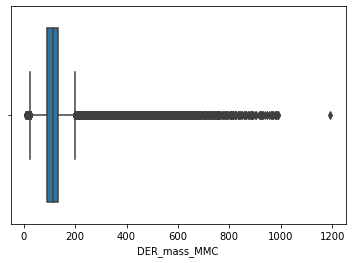

In [17]:
sns.boxplot(train_x_nomiss30.DER_mass_MMC)

/Users/ernestobocini/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DER_mass_MMC', ylabel='Density'>

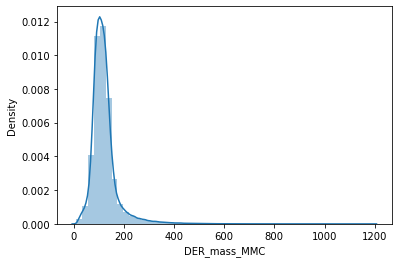

In [18]:
sns.distplot(train_x_nomiss30.DER_mass_MMC)

In [19]:
#Here is what the box plot would look like. You may note that the data is skewed. There are several or large numbers 
#of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, 
#in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for 
#replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, 
#one can use the mean value for imputing missing values.
#Let's use median!

In [20]:
train_x_nomiss30_median = train_x_nomiss30.fillna(train_x_nomiss30.median())
train_x_nomiss30_median.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_all_pt                 0
dtype: int64

In [21]:
x_nomiss30_median = train_x_nomiss30_median.to_numpy()
x_nomiss30_median.shape

(250000, 20)

In [22]:
# same but without pri data:

In [23]:
x_dre_nomiss30_median = x_nomiss30_median[:,:9]
x_dre_nomiss30_median.shape

(250000, 9)

In [24]:
# Imputation usin KNN:

In [25]:
from sklearn.impute import KNNImputer

In [26]:
knnimp = KNNImputer(n_neighbors= 3)

In [ ]:
knnimp.fit_transform(x_nomiss30[:,:9])